In [1]:
import sys
sys.path.append('pyFiles')
from largeEnv import CustomEnvironment
import networkx as nx
import pprint
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

## Q value

In [2]:
def q_val(env,state,action,s_values):
    env.reset()
    env.state = state
    reward = 0
    observations, rewards, terminations, truncations, infos = env.step(action)
    s_val_index = state_index_calculator(env,observations)
    for agent in env.possible_police:
        reward = rewards[agent]
    return reward + 0.6*s_values[s_val_index]

## State Value Function , Max Action Function , State Index Calculator, State Calculator


In [3]:
def s_val(env,state,s_values):
    for thief in env.possible_thieves:
        for police in env.possible_police:
            if state[thief] == state[police]:
                return 0
    q_values = []
    for j in range(4):
        for k in range(4):
            for l in range(4):
                temp_state = state.copy()
                action = {env.possible_agents[0]:random.randint(0,3),env.possible_agents[1]:k,env.possible_agents[2]:l} 
                q_values.append(q_val(env,temp_state,action,s_values))
    return max(q_values)

def max_act(env,state,s_values):
#     action = {env.possible_agents[0]:0,env.possible_agents[1]:0,env.possible_agents[2]:0,env.possible_agents[3]:0}
#     for thief in env.possible_thieves:
#         for police in env.possible_police:
#             if state[thief] == state[police]:
#                 return action
    q_values = [] 
    actions = []
    temp_state = state.copy()
    for k in range(4):
        for l in range(4):
            temp_state = state.copy()
            action = {env.possible_agents[0]:random.randint(0,3),env.possible_agents[1]:k,env.possible_agents[2]:l}
            q_values.append(q_val(env,temp_state,action,s_values))
            actions.append(action)
    max_val = max(q_values)
    max_val_index = q_values.index(max_val)
    env.state = state
    return actions[max_val_index]

def state_index_calculator(env,state):
    """ every possible state maps to an index. this function maps state to its index
    """
    multiplier = 1
    state_index = 0
    for agent in env.possible_agents:
        state_index += env.node_inv_dict[state[agent]]* multiplier
        multiplier *= env.g_no_node
    return state_index

def state_calculator(env,state_index):
    """ every possible state maps to an index. this function maps index to state
    """
    temp_state = {}
    for n in range (3):
        temp_state[env.possible_agents[n]] = env.node_dict[(state_index // (env.g_no_node**(3-n)))]
        state_index = state_index % (env.g_no_node**(3-n))
    return temp_state

## Single Sweep

In [4]:
def single_sweep(env,s_values):
    temp_value_func = [0] * env.g_no_node ** 3
    for i in range(env.g_no_node**3):
        state= state_calculator(env,i)
        temp_value_func[i] = s_val(env,state,s_values)
    return temp_value_func

## Until Convergence

In [5]:
env = CustomEnvironment() 
print(env.possible_agents)
print(env.g_no_node**3)
print(env)

['thief_0', 'police_0', 'police_1']
6859
custom_graph_environment_v3


In [10]:
state = env.reset()
s_values = [0] * env.g_no_node ** 3
delta = 15000
diff = 100000
count = 30
while (diff > delta):
    state = env.reset()
    temp_value_func = [v for v in s_values]
    s_values = single_sweep(env,s_values)
    temp_diff = 0;
    for index in range(len(s_values)):
        temp_diff += abs(temp_value_func[index]-s_values[index])
    diff = temp_diff
    # plt.plot(range(env.g_no_node**3),s_values)
    # plt.show()

    print(temp_diff)
    
s_values2 = [0] * env.g_no_node ** 3


191615.0
221347.0
206983.40000000538
181148.14499999225
149251.32699999624
118633.81100000317
90856.39569999455
79557.8066400025
74455.67074599277
69342.05232439876
59960.70736913921
48888.46290134682
41327.19939635858
31691.323309924082
30233.497746161094
26621.728674399714
23576.21856827254
21736.07338411527
21186.297411524476
24047.063545992492
24054.234888734067
19217.965384505922
19616.43213211647
20669.853482191247
20071.08144135874
21523.98718106479
20486.73182777902
18941.0401795598
19667.049607896883
19619.460323520874
18753.93973448889
21748.946103502658
26140.214653315255
24992.782008891318
23374.804987673284
28485.286773851225
28153.435138706565
30989.00768243132
26334.59721593726
20038.341699692635
19073.038961748713
19191.948598782918
19866.94038328124
19287.05692956007
19245.297409931278
19123.440938764157
19489.5661688104
22230.93894145095
23810.915465245947
20416.954455091174
19404.512254499703
20660.992395027723
24067.460013760487
24260.718998418877
23152.536766312573

Traceback (most recent call last):
  File "c:\Users\97798\Desktop\current\environments\openai-gym\lib\site-packages\IPython\core\interactiveshell.py", line 3548, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\97798\AppData\Local\Temp\ipykernel_20828\3559647097.py", line 9, in <module>
    s_values = single_sweep(env,s_values)
  File "C:\Users\97798\AppData\Local\Temp\ipykernel_20828\298804710.py", line 5, in single_sweep
    temp_value_func[i] = s_val(env,state,s_values)
  File "C:\Users\97798\AppData\Local\Temp\ipykernel_20828\854937879.py", line 12, in s_val
    q_values.append(q_val(env,temp_state,action,s_values))
  File "C:\Users\97798\AppData\Local\Temp\ipykernel_20828\2837709397.py", line 5, in q_val
    observations, rewards, terminations, truncations, infos = env.step(action)
  File "c:\Users\97798\Desktop\RL-Patrolling\largeNetowrk\pyFiles\largeEnv.py", line -1, in step
KeyboardInterrupt

During handling of the above exception, another exce

## Visualization of convergence

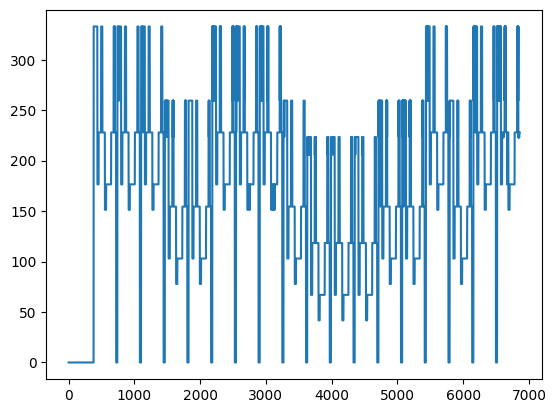

In [7]:
plt.plot(range(env.g_no_node**3),s_values)
plt.show()

<Axes: >

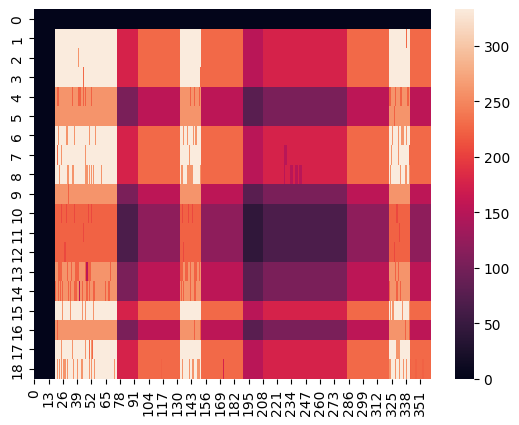

In [8]:
import seaborn as sns
import numpy as np
no_of_nodes = 19
x = np.zeros((no_of_nodes**1,no_of_nodes**2))

for n in range(len(s_values)):
    i = n // no_of_nodes**2
    j = n % no_of_nodes**2
    x[i,j] = s_values[n]

# sns.set(rc={'figure.figsize':(13,10)})
sns.heatmap(x)

## Implementataion of Policy

Run no 1

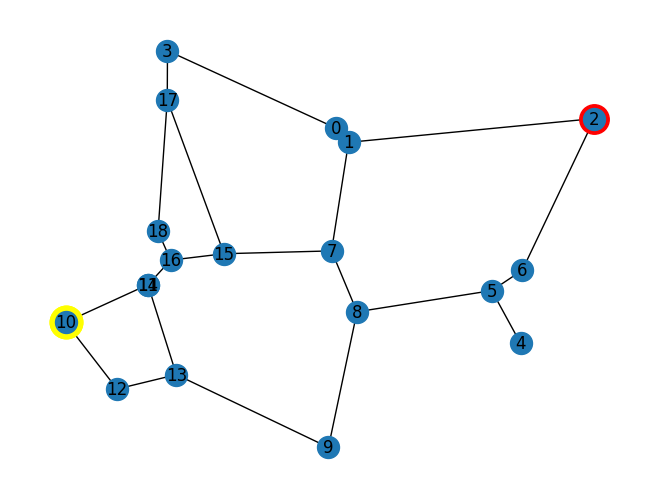

{'thief_0': '(0.9956001267050132, 0.697537144108571)', 'police_0': '(0.18534535116246542, 0.35829316577499914)', 'police_1': '(0.18534535116246542, 0.35829316577499914)'}
{'thief_0': '(0.9956001267050132, 0.697537144108571)', 'police_0': '(0.18534535116246542, 0.35829316577499914)', 'police_1': '(0.18534535116246542, 0.35829316577499914)'}


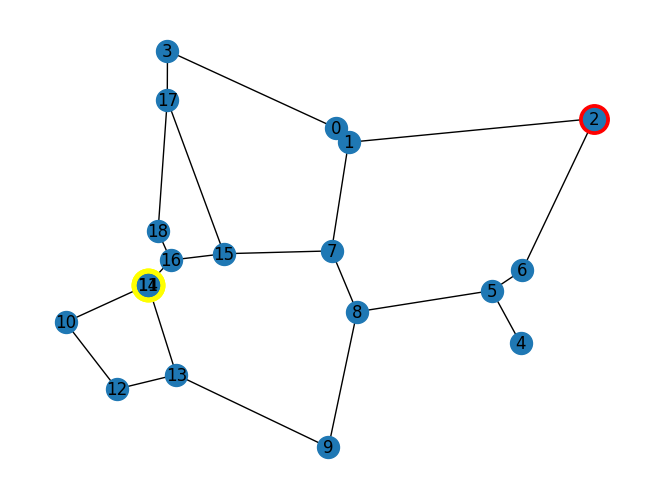

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.9956001267050132, 0.697537144108571)', 'police_0': '(0.18603234278774222, 0.3583004912070694)', 'police_1': '(0.18603234278774222, 0.3583004912070694)'}
{'thief_0': '(0.9956001267050132, 0.697537144108571)', 'police_0': '(0.18603234278774222, 0.3583004912070694)', 'police_1': '(0.18603234278774222, 0.3583004912070694)'}


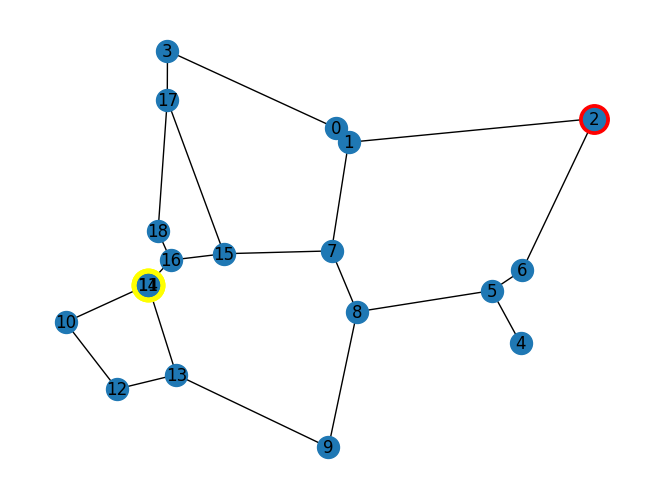

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.9956001267050132, 0.697537144108571)', 'police_0': '(0.22719293694892034, 0.4086489882761455)', 'police_1': '(0.23752780572773582, 0.17508099178756828)'}
{'thief_0': '(0.9956001267050132, 0.697537144108571)', 'police_0': '(0.22719293694892034, 0.4086489882761455)', 'police_1': '(0.23752780572773582, 0.17508099178756828)'}


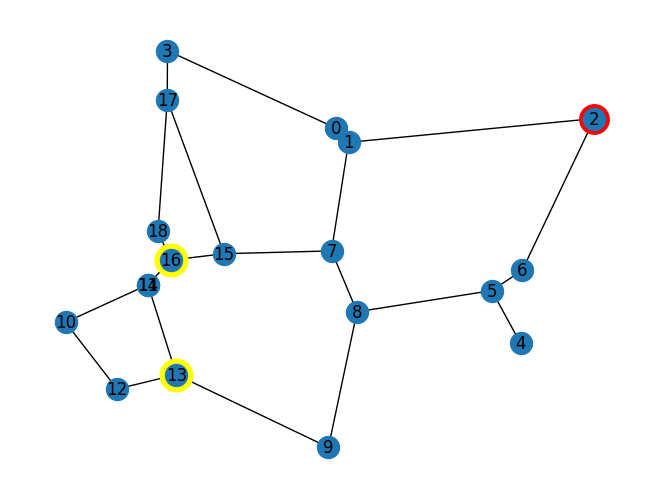

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.5497170519864252, 0.6489559391432813)', 'police_0': '(0.3239998996475134, 0.421748832198577)', 'police_1': '(0.5132506001046624, 0.02674563925634386)'}
{'thief_0': '(0.5497170519864252, 0.6489559391432813)', 'police_0': '(0.3239998996475134, 0.421748832198577)', 'police_1': '(0.5132506001046624, 0.02674563925634386)'}


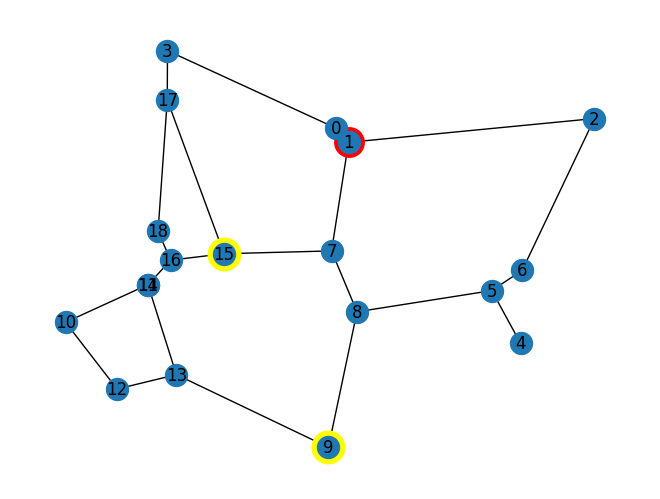

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.5270280200445087, 0.6779268981349057)', 'police_0': '(0.22103375773299358, 0.7354697769755237)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}
{'thief_0': '(0.5270280200445087, 0.6779268981349057)', 'police_0': '(0.22103375773299358, 0.7354697769755237)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}


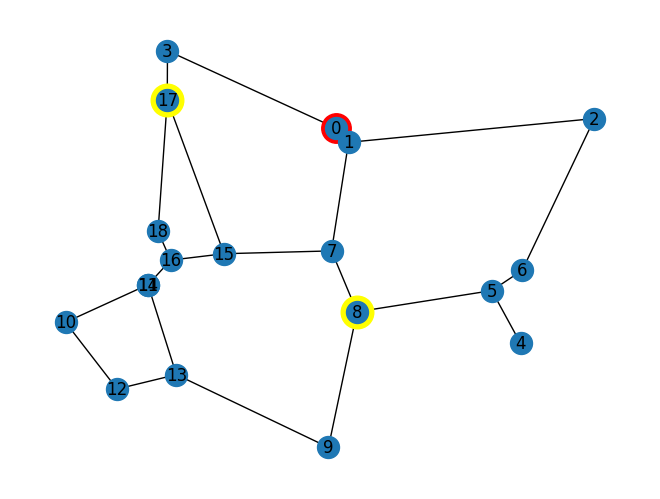

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.5497170519864252, 0.6489559391432813)', 'police_0': '(0.22141926864596084, 0.8360362219564399)', 'police_1': '(0.5188809844123248, 0.4275302128012416)'}
{'thief_0': '(0.5497170519864252, 0.6489559391432813)', 'police_0': '(0.22141926864596084, 0.8360362219564399)', 'police_1': '(0.5188809844123248, 0.4275302128012416)'}


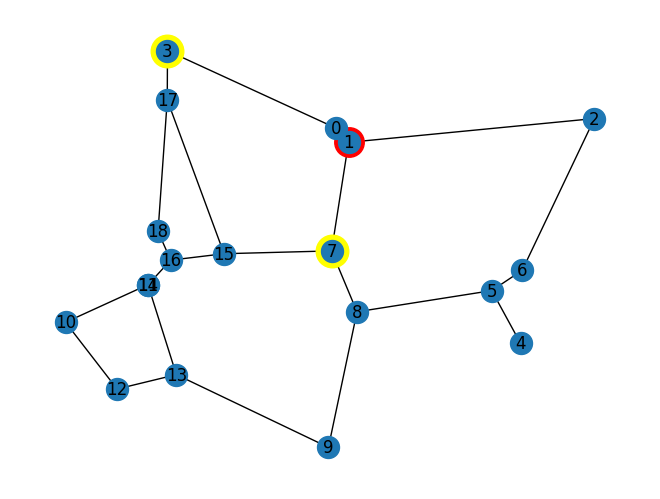

{'thief_0': False, 'police_0': False, 'police_1': False}
{'police_0': '(0.22103375773299358, 0.7354697769755237)', 'police_1': '(0.5188809844123248, 0.4275302128012416)'}
{'thief_0': '(0.5497170519864252, 0.6489559391432813)', 'police_0': '(0.22103375773299358, 0.7354697769755237)', 'police_1': '(0.5188809844123248, 0.4275302128012416)'}


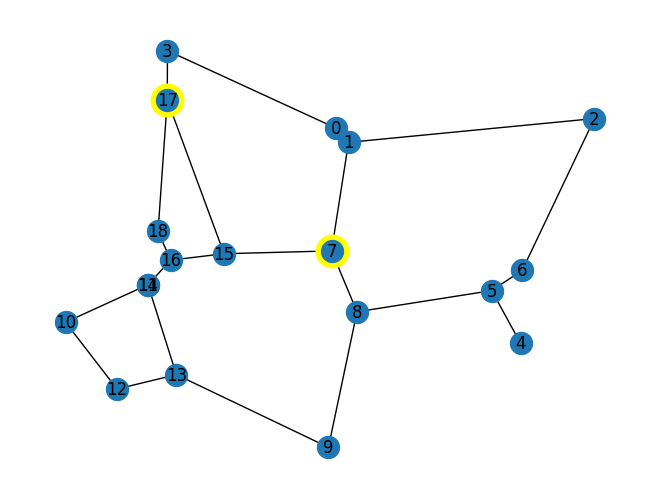

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.5497170519864252, 0.6489559391432813)', 'police_0': '(0.3239998996475134, 0.421748832198577)', 'police_1': '(0.5497170519864252, 0.6489559391432813)'}
{'thief_0': '(0.5497170519864252, 0.6489559391432813)', 'police_0': '(0.3239998996475134, 0.421748832198577)', 'police_1': '(0.5497170519864252, 0.6489559391432813)'}


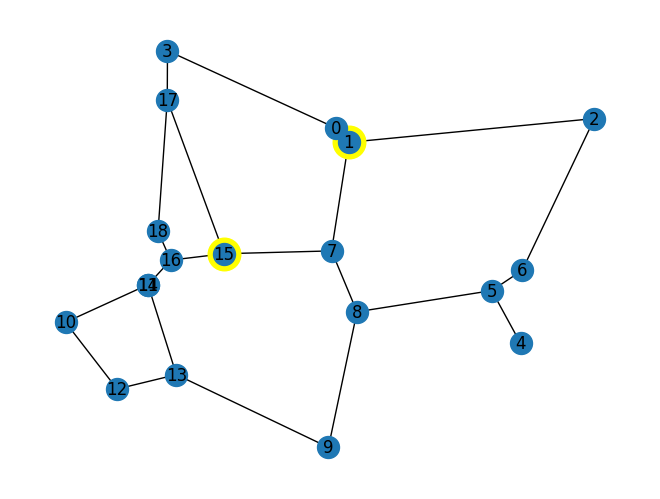

{'thief_0': True, 'police_0': False, 'police_1': False}
terminating episode = 7
Episode: 1 Score: {'thief_0': -45, 'police_0': -40, 'police_1': 60} 



In [9]:

episodes = 1    
for episode in range(1,episodes+1):
    state = env.reset()
    terminations = {agent:False for agent in env.possible_agents}
    score = {a:0 for a in env.possible_agents}
    count = 0
    env.temp_render(episode)
    terminated = False
    while not terminated:
        action = max_act(env,state,s_values)
        observations, rewards, terminations, truncations, infos = env.step(action)
        state = env.state
        print(observations)
        print(env.state)
        env.temp_render(episode)
        print(terminations)
        if (terminations['thief_0'] == True):
            print('terminating episode = {}'.format(count))
            terminated = True
        for agent in env.agents:
            score[agent] += rewards[agent]
        count += 1
    print('Episode: {} Score: {} \n'.format(episode,score))

Run no 2

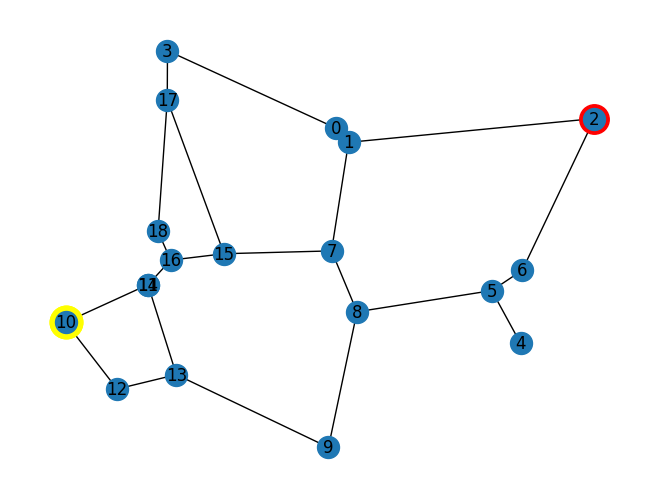

{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.18534535116246542, 0.35829316577499914)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.18534535116246542, 0.35829316577499914)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


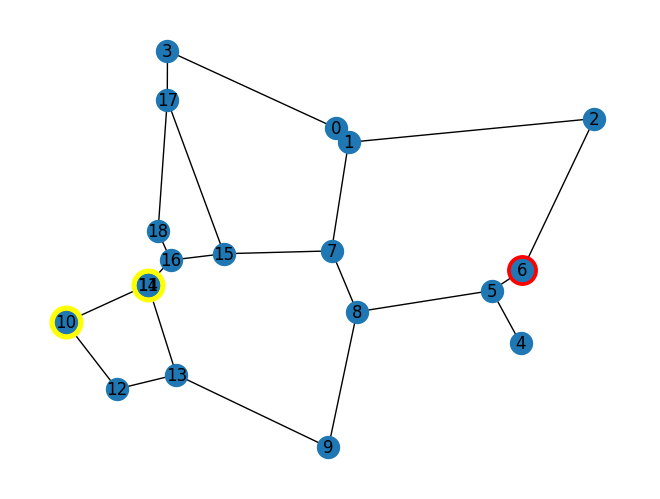

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.9956001267050132, 0.697537144108571)', 'police_0': '(0.18603234278774222, 0.3583004912070694)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.9956001267050132, 0.697537144108571)', 'police_0': '(0.18603234278774222, 0.3583004912070694)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


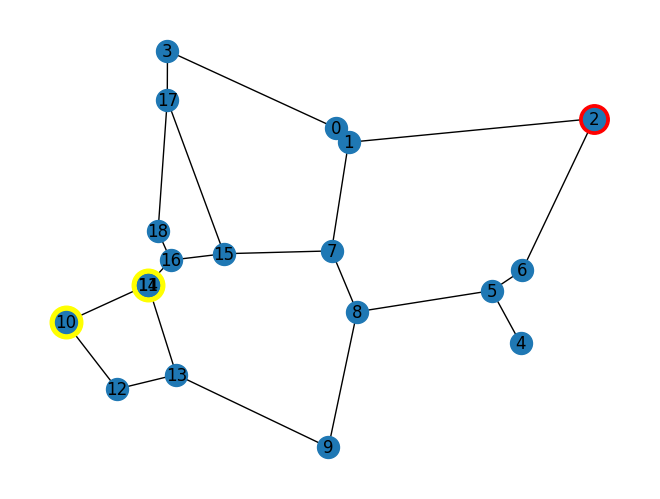

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.9956001267050132, 0.697537144108571)', 'police_0': '(0.22719293694892034, 0.4086489882761455)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.9956001267050132, 0.697537144108571)', 'police_0': '(0.22719293694892034, 0.4086489882761455)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


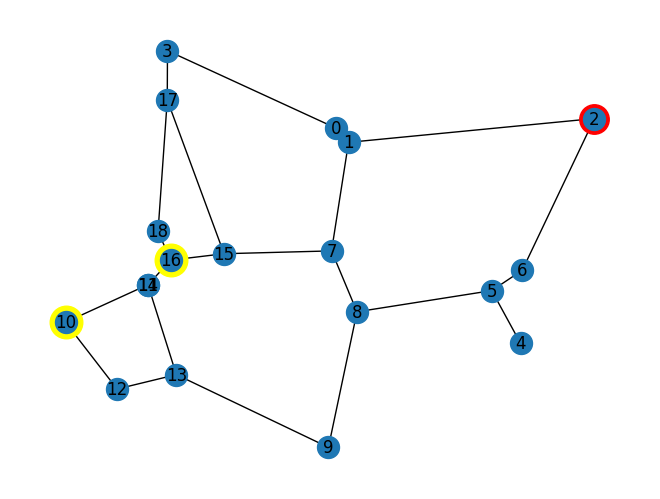

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.5497170519864252, 0.6489559391432813)', 'police_0': '(0.3239998996475134, 0.421748832198577)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.5497170519864252, 0.6489559391432813)', 'police_0': '(0.3239998996475134, 0.421748832198577)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


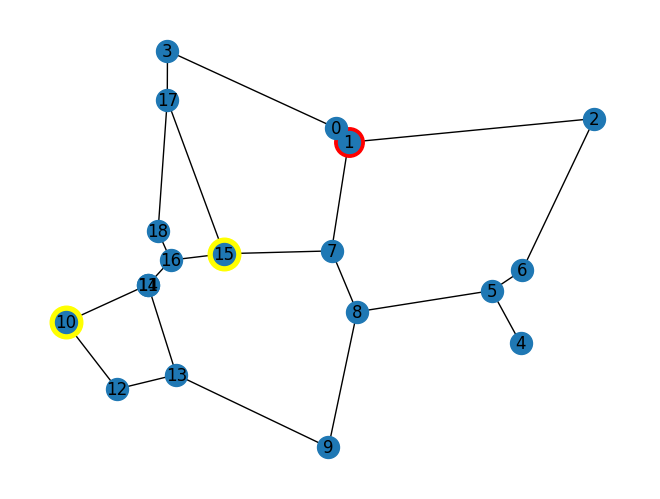

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.5270280200445087, 0.6779268981349057)', 'police_0': '(0.22103375773299358, 0.7354697769755237)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.5270280200445087, 0.6779268981349057)', 'police_0': '(0.22103375773299358, 0.7354697769755237)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


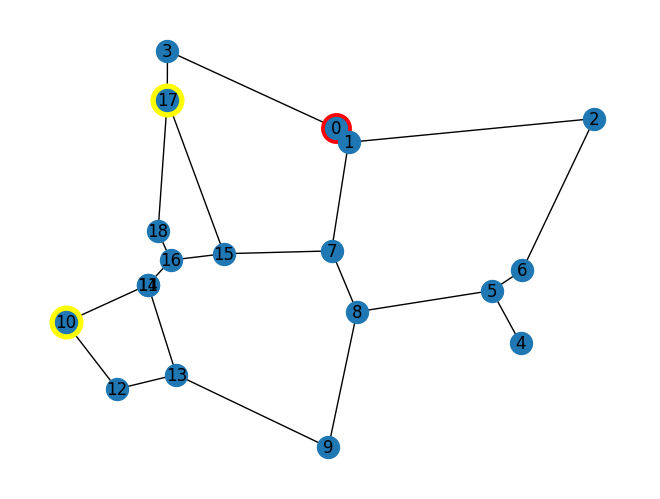

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.5497170519864252, 0.6489559391432813)', 'police_0': '(0.22141926864596084, 0.8360362219564399)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.5497170519864252, 0.6489559391432813)', 'police_0': '(0.22141926864596084, 0.8360362219564399)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


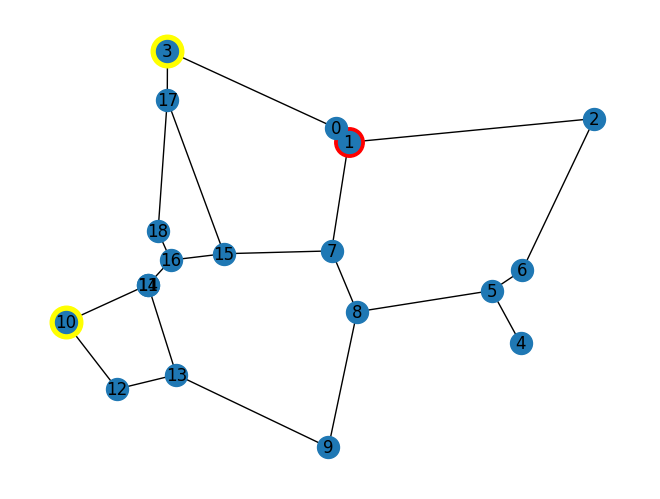

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.5270280200445087, 0.6779268981349057)', 'police_0': '(0.22103375773299358, 0.7354697769755237)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.5270280200445087, 0.6779268981349057)', 'police_0': '(0.22103375773299358, 0.7354697769755237)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


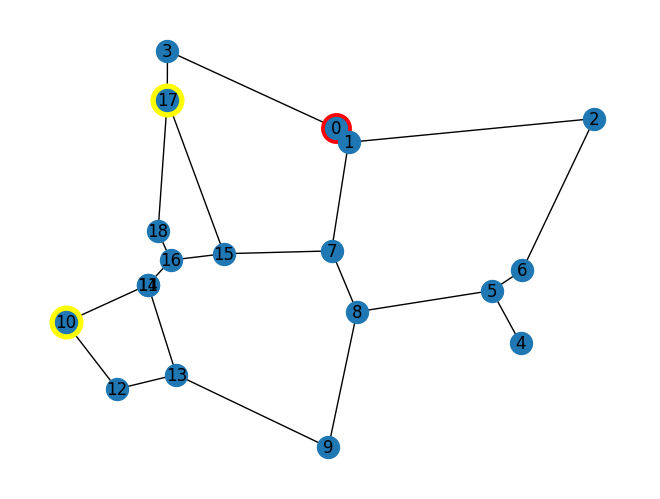

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.5270280200445087, 0.6779268981349057)', 'police_0': '(0.22141926864596084, 0.8360362219564399)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.5270280200445087, 0.6779268981349057)', 'police_0': '(0.22141926864596084, 0.8360362219564399)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


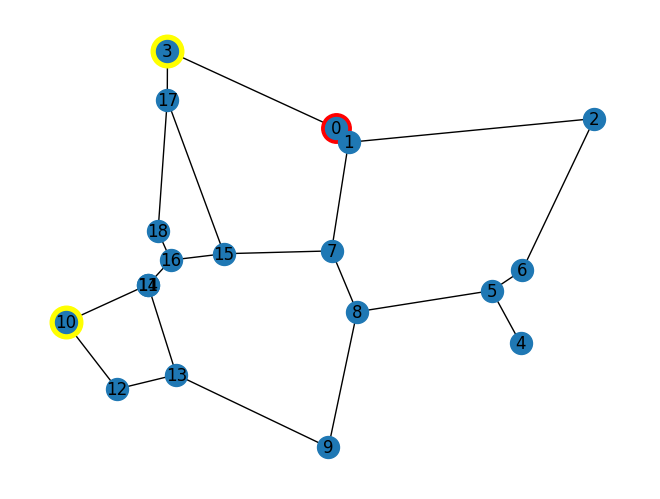

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.5270280200445087, 0.6779268981349057)', 'police_0': '(0.22103375773299358, 0.7354697769755237)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.5270280200445087, 0.6779268981349057)', 'police_0': '(0.22103375773299358, 0.7354697769755237)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


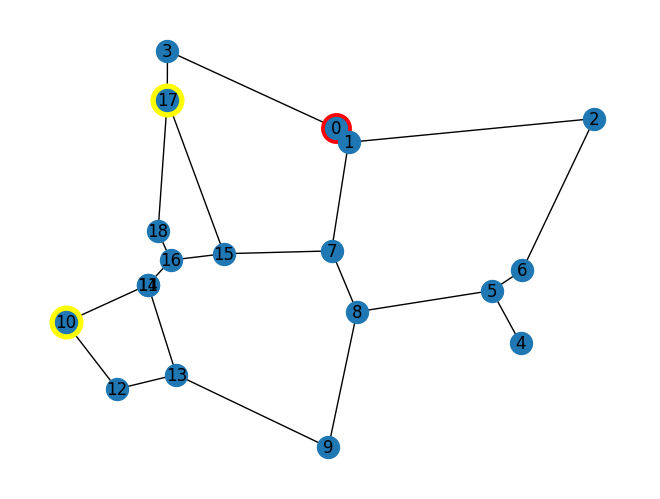

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.5270280200445087, 0.6779268981349057)', 'police_0': '(0.22141926864596084, 0.8360362219564399)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.5270280200445087, 0.6779268981349057)', 'police_0': '(0.22141926864596084, 0.8360362219564399)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


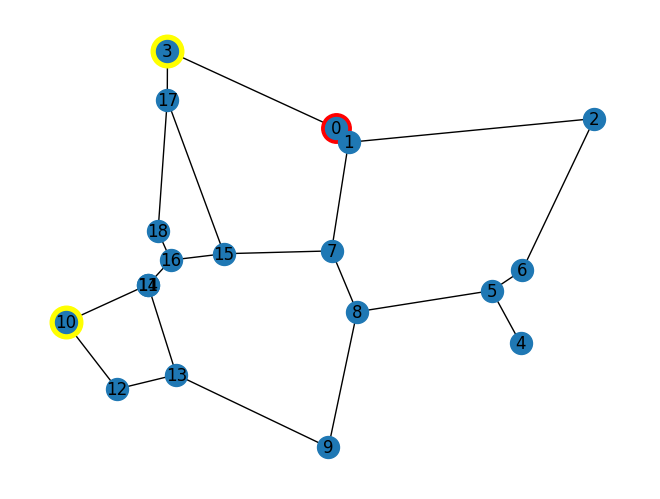

{'thief_0': False, 'police_0': False, 'police_1': False}
{'police_0': '(0.22103375773299358, 0.7354697769755237)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.5270280200445087, 0.6779268981349057)', 'police_0': '(0.22103375773299358, 0.7354697769755237)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


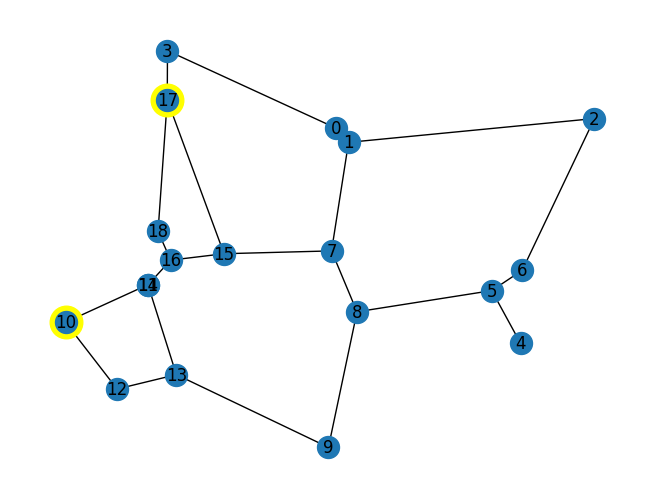

{'police_0': False, 'police_1': False}


KeyError: 'thief_0'

In [12]:

episodes = 1    
for episode in range(1,episodes+1):
    state = env.reset()
    terminations = {agent:False for agent in env.possible_agents}
    score = {a:0 for a in env.possible_agents}
    count = 0
    env.temp_render(episode)
    terminated = False
    while not terminated:
        action = max_act(env,state,s_values)
        observations, rewards, terminations, truncations, infos = env.step(action)
        state = env.state
        print(observations)
        print(env.state)
        env.temp_render(episode)
        print(terminations)
        if (terminations['thief_0'] == True):
            print('terminating episode = {}'.format(count))
            terminated = True
        for agent in env.agents:
            score[agent] += rewards[agent]
        count += 1
    print('Episode: {} Score: {} \n'.format(episode,score))

Run no 3

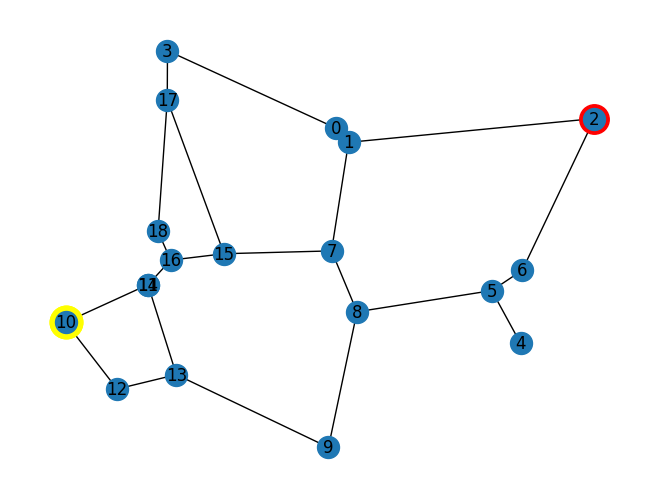

{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.18534535116246542, 0.35829316577499914)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.18534535116246542, 0.35829316577499914)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


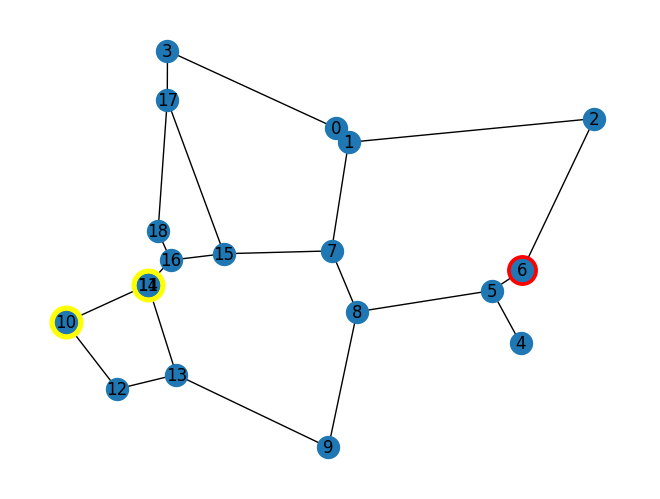

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.18603234278774222, 0.3583004912070694)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.18603234278774222, 0.3583004912070694)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


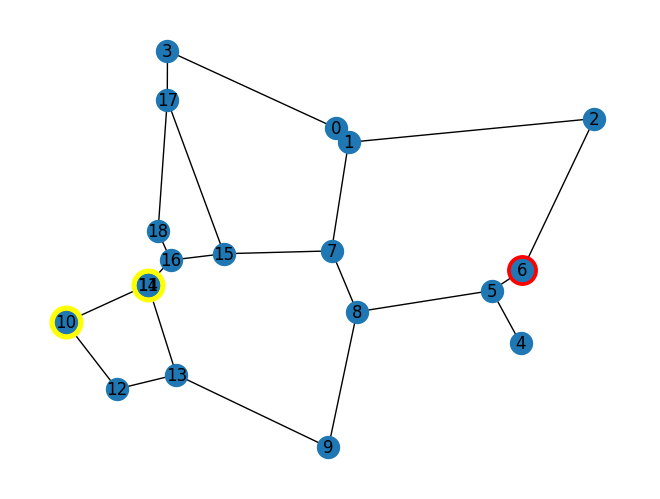

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.8094125332714186, 0.3465499248356554)', 'police_0': '(0.22719293694892034, 0.4086489882761455)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.8094125332714186, 0.3465499248356554)', 'police_0': '(0.22719293694892034, 0.4086489882761455)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


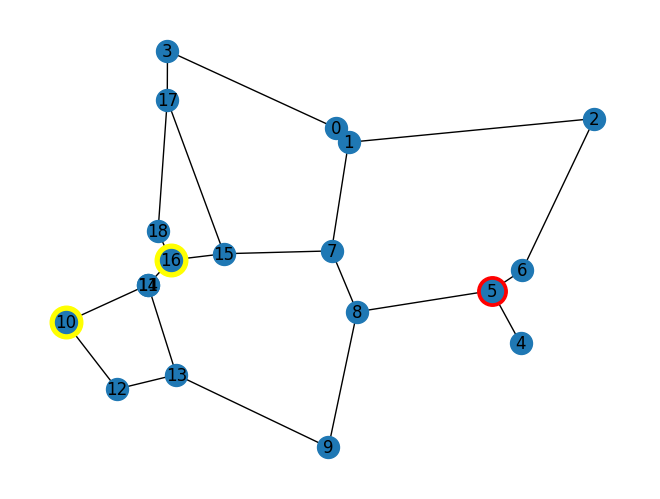

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.8094125332714186, 0.3465499248356554)', 'police_0': '(0.3239998996475134, 0.421748832198577)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.8094125332714186, 0.3465499248356554)', 'police_0': '(0.3239998996475134, 0.421748832198577)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


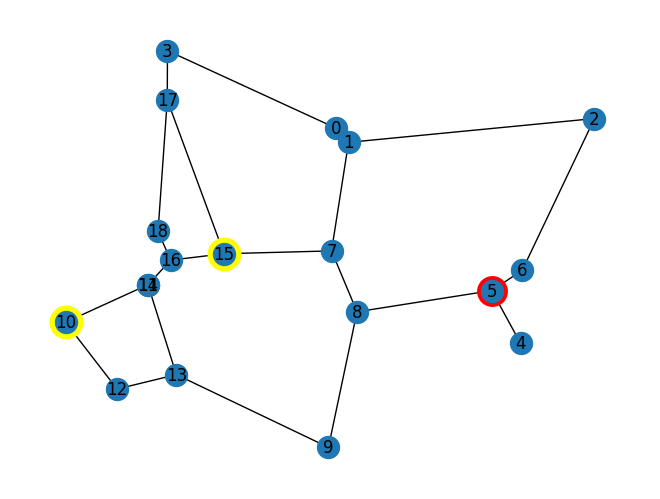

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.565075255173567, 0.3032727813989422)', 'police_0': '(0.5188809844123248, 0.4275302128012416)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.565075255173567, 0.3032727813989422)', 'police_0': '(0.5188809844123248, 0.4275302128012416)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


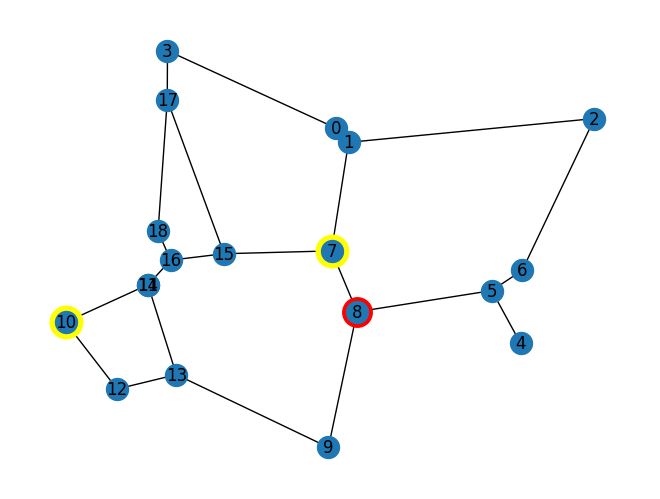

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.8094125332714186, 0.3465499248356554)', 'police_0': '(0.5497170519864252, 0.6489559391432813)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.8094125332714186, 0.3465499248356554)', 'police_0': '(0.5497170519864252, 0.6489559391432813)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


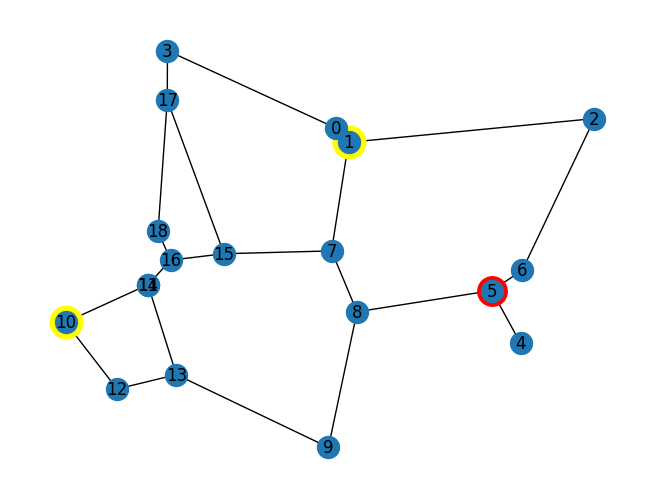

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.9956001267050132, 0.697537144108571)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.9956001267050132, 0.697537144108571)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


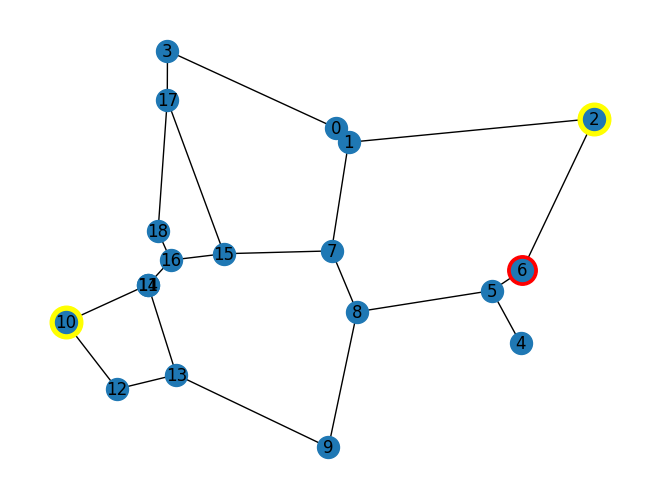

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.5497170519864252, 0.6489559391432813)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.5497170519864252, 0.6489559391432813)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


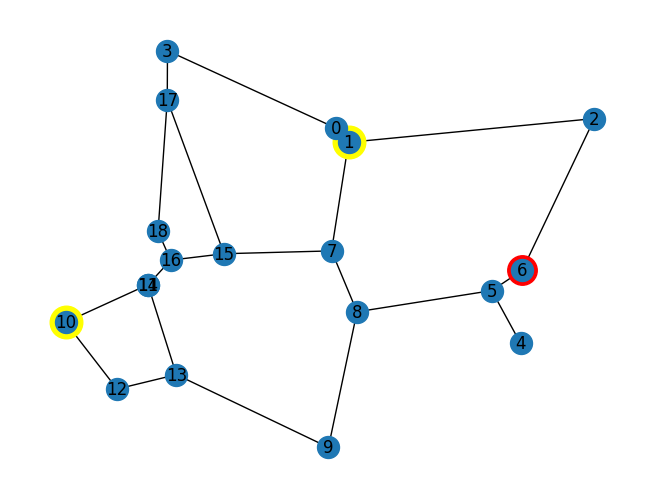

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.9956001267050132, 0.697537144108571)', 'police_0': '(0.9956001267050132, 0.697537144108571)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}
{'thief_0': '(0.9956001267050132, 0.697537144108571)', 'police_0': '(0.9956001267050132, 0.697537144108571)', 'police_1': '(0.036589760132480026, 0.2818389296983441)'}


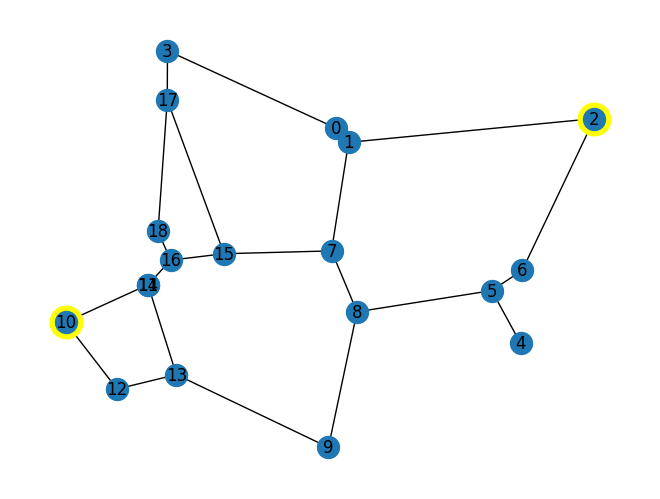

{'thief_0': True, 'police_0': False, 'police_1': False}
terminating episode = 8
Episode: 1 Score: {'thief_0': -22, 'police_0': -6, 'police_1': -9} 



In [13]:

episodes = 1    
for episode in range(1,episodes+1):
    state = env.reset()
    terminations = {agent:False for agent in env.possible_agents}
    score = {a:0 for a in env.possible_agents}
    count = 0
    env.temp_render(episode)
    terminated = False
    while not terminated:
        action = max_act(env,state,s_values)
        observations, rewards, terminations, truncations, infos = env.step(action)
        state = env.state
        print(observations)
        print(env.state)
        env.temp_render(episode)
        print(terminations)
        if (terminations['thief_0'] == True):
            print('terminating episode = {}'.format(count))
            terminated = True
        for agent in env.agents:
            score[agent] += rewards[agent]
        count += 1
    print('Episode: {} Score: {} \n'.format(episode,score))